In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/[2024-2025]_AN2DL/Homework 1')

In [3]:
#Create a requirements.txt file in which you'll specify the versions of the libraries you want

%%writefile requirements.txt
tensorflow==2.17.0
keras==3.4.1

Overwriting requirements.txt


In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 619.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 22.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
 

In [5]:
import numpy as np
import os

import tensorflow as tf
#from tensorflow import keras as tfk
import keras as tfk       #notice how I'm importing keras and not tensorflow.keras
from keras.layers import Input, Dense, Dropout, Lambda
#from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from keras import layers as tfkl


print(f"Tensorflow version (2.17) -> {tf.__version__}")
print(f"Keras version (3.4.1) -> {tfk.__version__}")

Tensorflow version (2.17) -> 2.17.0
Keras version (3.4.1) -> 3.4.1


In [ ]:
!pip install keras-cv
!pip install tensorflow-probability


In [7]:
print(f"Tensorflow version (2.17) -> {tf.__version__}")
print(f"Keras version (3.4.1) -> {tfk.__version__}")

Tensorflow version (2.17) -> 2.17.0
Keras version (3.4.1) -> 3.4.1


In [8]:
from keras import models, optimizers, callbacks
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
import matplotlib.pyplot as plt

from keras import mixed_precision
import keras_cv  # Keras CV for augmentation layers
#import tensorflow_probability as tfp
import random
import tensorflow as tf
#from tensorflow import keras as tfk
import keras as tfk       #notice how I'm importing keras and not tensorflow.keras
from keras.layers import Input, Dense, Dropout, Lambda
#from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from keras import layers as tfkl

In [9]:
print(f"Tensorflow version (2.17) -> {tf.__version__}")
print(f"Keras version (3.4.1) -> {tfk.__version__}")

Tensorflow version (2.17) -> 2.17.0
Keras version (3.4.1) -> 3.4.1


In [10]:
# ================================
# Imports and Configuration
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from tensorflow.keras.applications import InceptionResNetV2, EfficientNetV2B3
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess_inception
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input as preprocess_efficientnet

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
# ================================
# Global Variables and Parameters
# ================================

FILE_PATH = 'training_set_no_outliers.npz'

INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 8  # Adjust based on your dataset
BATCH_SIZE = 512  # Adjust based on your hardware

MODEL_EXTENSIONS = {
    "best_inceptionresnetv2_model": (InceptionResNetV2, preprocess_inception),
    "best_efficientnetv2b3_model": (EfficientNetV2B3, preprocess_efficientnet)
}

CLASS_NAMES = [f'class_{i}' for i in range(NUM_CLASSES)]

In [12]:
print(f"Tensorflow version (2.17) -> {tf.__version__}")
print(f"Keras version (3.4.1) -> {tfk.__version__}")

Tensorflow version (2.17) -> 2.17.0
Keras version (3.4.1) -> 3.4.1


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as tfkl
from tensorflow.keras.models import load_model

In [14]:

import keras_cv  # Keras CV for augmentation layers

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Set mixed precision policy
# Uncomment the line below to enable mixed precision
# tf.keras.mixed_precision.set_global_policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy('float32')  # Use 'float32' precision

# Print library versions
print(f"Tensorflow version (2.17) -> {tf.__version__}")
print(f"Keras version (3.4.1) -> {tfk.__version__}")
print(f"Keras CV version -> {keras_cv.__version__}")



Tensorflow version (2.17) -> 2.17.0
Keras version (3.4.1) -> 3.4.1
Keras CV version -> 0.9.0


In [15]:

# ================================
# Data Loading and Preprocessing
# ================================

def load_data(file_path):
    """Load dataset from a .npz file."""
    with np.load(file_path) as data:
        images = data['images']
        labels = data['labels']
    return images, labels

def split_data(images, labels, test_size=0.2, validation_size=0.2):
    """Split data into training, validation, and test sets."""
    labels = labels.flatten()
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        images,
        labels,
        test_size=test_size,
        random_state=42,
        stratify=labels
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val,
        y_train_val,
        test_size=validation_size,
        random_state=42,
        stratify=y_train_val
    )
    return X_train, X_val, X_test, y_train, y_val, y_test

def oversample_data(X, y):
    """Perform oversampling to balance the dataset."""
    class_counts = pd.Series(y).value_counts()
    max_count = class_counts.max()
    print(f"Maximum class count: {max_count}")

    X_oversampled = []
    y_oversampled = []

    for class_label, count in class_counts.items():
        X_class = X[y == class_label]
        y_class = y[y == class_label]
        samples_needed = max_count - len(X_class)

        if samples_needed > 0:
            duplicates = samples_needed // len(X_class)
            remainder = samples_needed % len(X_class)
            for _ in range(duplicates):
                X_oversampled.append(X_class)
                y_oversampled.append(y_class)
            if remainder > 0:
                indices = np.random.choice(len(X_class), size=remainder, replace=True)
                X_oversampled.append(X_class[indices])
                y_oversampled.append(y_class[indices])

    if X_oversampled:
        X_oversampled = np.vstack(X_oversampled)
        y_oversampled = np.hstack(y_oversampled)
        X_balanced = np.vstack((X, X_oversampled))
        y_balanced = np.hstack((y, y_oversampled))
    else:
        X_balanced = X
        y_balanced = y

    print(f"Training set shape after oversampling: {X_balanced.shape}, {y_balanced.shape}")
    return X_balanced, y_balanced


In [16]:
# ================================
# Data Augmentation Layers
# ================================

random_flip_layer = keras_cv.layers.RandomFlip("horizontal_and_vertical")
random_rotation_layer = keras_cv.layers.RandomRotation(factor=0.2)
random_zoom_layer = keras_cv.layers.RandomZoom(height_factor=0.2, width_factor=0.2)
rand_augment_layer = keras_cv.layers.RandAugment(value_range=(0, 1), magnitude=0.2, augmentations_per_image=2)

In [17]:
# ================================
# Preprocessing Functions
# ================================

def preprocess_and_augment(images, labels, preprocess_fn):
    """Apply preprocessing and augmentation to training images."""
    images = tf.image.resize(images, [224, 224])
    images = tf.cast(images, tf.float32) / 255.0  # Normalize to [0, 1]
    images = random_flip_layer(images)
    images = random_rotation_layer(images)
    images = random_zoom_layer(images)
    images = rand_augment_layer(images)
    images = preprocess_fn(images * 255.0)  # Model-specific preprocessing
    labels = tf.one_hot(tf.cast(labels, tf.int32), depth=NUM_CLASSES)
    return images, labels

def preprocess_validation(images, labels, preprocess_fn):
    """Apply preprocessing to validation and test images."""
    images = tf.image.resize(images, [224, 224])
    images = tf.cast(images, tf.float32)
    images = preprocess_fn(images)
    labels = tf.one_hot(labels, depth=NUM_CLASSES)
    labels = tf.cast(labels, tf.float32)
    return images, labels

In [18]:
# ================================
# Visualization Functions
# ================================

def plot_confusion_matrix(cm, class_names, title):
    """Plot confusion matrix using Seaborn heatmap."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_classification_results(y_true, y_pred, y_probs, dataset_name, class_names, images, num_samples=5):
    """Plot confusion matrix and display sample misclassified and correctly classified images."""
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_names, f'{dataset_name} Set')

    # Classification report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print(f"{dataset_name} Classification Report:\n{report}")

    # Display misclassified and correctly classified samples
    misclassified = np.where(y_pred != y_true)[0]
    correctly_classified = np.where(y_pred == y_true)[0]

    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 2 * num_samples))
    for i in range(num_samples):
        # Misclassified
        if i < len(misclassified):
            idx = misclassified[i]
            image = (images[idx] - np.min(images[idx])) / (np.max(images[idx]) - np.min(images[idx]))
            axes[i, 0].imshow(image)
            axes[i, 0].set_title(f"Misclassified\nTrue: {class_names[y_true[idx]]}, Pred: {class_names[y_pred[idx]]}")
            axes[i, 0].axis("off")
        else:
            axes[i, 0].axis("off")

        # Correctly classified
        if i < len(correctly_classified):
            idx = correctly_classified[i]
            image = (images[idx] - np.min(images[idx])) / (np.max(images[idx]) - np.min(images[idx]))
            axes[i, 1].imshow(image)
            axes[i, 1].set_title(f"Correct\nTrue: {class_names[y_true[idx]]}")
            axes[i, 1].axis("off")
        else:
            axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

def plot_combined_confusion_matrices(results, model_names, dataset='test'):
    """Plot confusion matrices for multiple models side by side."""
    num_models = len(model_names)
    plt.figure(figsize=(6 * num_models, 6))

    for idx, model_name in enumerate(model_names):
        y_true = results[model_name][dataset]['true']
        y_pred = results[model_name][dataset]['pred']
        cm = confusion_matrix(y_true, y_pred)

        plt.subplot(1, num_models, idx + 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
        plt.title(f'{model_name} - {dataset.capitalize()} Confusion')
        plt.xlabel('Predicted')
        plt.ylabel('True')

    plt.tight_layout()
    plt.show()

In [29]:
# ================================
# Evaluation and Analysis Functions
# ================================

def evaluate_model_performance(model, dataset):
    """Evaluate model performance and collect predictions."""
    loss, accuracy = model.evaluate(dataset, verbose=0)
    return loss, accuracy

def collect_predictions(model, dataset):
    """Collect true labels and predicted probabilities from the dataset."""
    y_true = []
    y_pred_probs = []

    for batch in dataset:
        X_batch, y_batch = batch
        y_true.extend(np.argmax(y_batch.numpy(), axis=1))
        preds_batch = model.predict(X_batch)
        y_pred_probs.extend(preds_batch)

    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)
    y_pred = np.argmax(y_pred_probs, axis=1)

    return y_true, y_pred, y_pred_probs

def analyze_misclassified_probabilities(y_true, y_pred, y_probs, class_names):
    """Analyze confidence levels for misclassified images."""
    misclassified_indices = np.where(y_pred != y_true)[0]
    if len(misclassified_indices) == 0:
        print("No misclassified images to analyze.")
        return
    misclassified_probs = y_probs[misclassified_indices]
    true_labels = y_true[misclassified_indices]
    predicted_labels = y_pred[misclassified_indices]

    # Confidence for true class
    true_class_confidences = y_probs[misclassified_indices, true_labels]

    # Confidence for predicted class
    predicted_class_confidences = y_probs[misclassified_indices, predicted_labels]

    plt.figure(figsize=(10, 5))
    sns.histplot(true_class_confidences, color='blue', label='True Class Confidence', kde=True, stat="density", bins=30)
    sns.histplot(predicted_class_confidences, color='red', label='Predicted Class Confidence', kde=True, stat="density", bins=30)
    plt.title('Confidence Levels for Misclassified Images')
    plt.xlabel('Confidence')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Summary statistics
    print(f"Misclassified Images: {len(misclassified_indices)}")
    print(f"Average True Class Confidence: {np.mean(true_class_confidences):.4f}")
    print(f"Average Predicted Class Confidence: {np.mean(predicted_class_confidences):.4f}")

def compare_model_misclassifications(results, model_a, model_b, dataset='test'):
    """Compare misclassifications between two models."""
    # Determine which dataset to use
    if dataset == 'test':
        X_data = X_test
    elif dataset == 'train':
        X_data = X_train_balanced
    else:
        raise ValueError("Invalid dataset type. Choose 'test' or 'train'.")

    y_true = np.array(results[model_a][dataset]['true'])
    pred_a = np.array(results[model_a][dataset]['pred'])
    pred_b = np.array(results[model_b][dataset]['pred'])

    # Misclassified by A but correctly by B
    mis_a_correct_b = np.where((pred_a != y_true) & (pred_b == y_true))[0]

    # Misclassified by B but correctly by A
    mis_b_correct_a = np.where((pred_b != y_true) & (pred_a == y_true))[0]

    print(f"\nComparison on {dataset.capitalize()} Set:")
    print(f"Images misclassified by {model_a} but correctly by {model_b}: {len(mis_a_correct_b)}")
    print(f"Images misclassified by {model_b} but correctly by {model_a}: {len(mis_b_correct_a)}")

    # Visualize some of these images
    num_samples = min(5, len(mis_a_correct_b), len(mis_b_correct_a))
    if num_samples > 0:
        fig, axes = plt.subplots(num_samples, 2, figsize=(10, 4 * num_samples))
        for i in range(num_samples):
            # Misclassified by A, Correct by B
            idx_a = mis_a_correct_b[i]
            image_a = (X_data[idx_a] - np.min(X_data[idx_a])) / (np.max(X_data[idx_a]) - np.min(X_data[idx_a]))
            axes[i, 0].imshow(image_a)
            axes[i, 0].set_title(f"{model_a} Misclassified\nTrue: {CLASS_NAMES[y_true[idx_a]]}, Pred: {CLASS_NAMES[pred_a[idx_a]]}")
            axes[i, 0].axis("off")

            # Misclassified by B, Correct by A
            idx_b = mis_b_correct_a[i]
            image_b = (X_data[idx_b] - np.min(X_data[idx_b])) / (np.max(X_data[idx_b]) - np.min(X_data[idx_b]))
            axes[i, 1].imshow(image_b)
            axes[i, 1].set_title(f"{model_b} Misclassified\nTrue: {CLASS_NAMES[y_true[idx_b]]}, Pred: {CLASS_NAMES[pred_b[idx_b]]}")
            axes[i, 1].axis("off")

        plt.tight_layout()
        plt.show()


def analyze_model_disagreements(results, model_a, model_b, dataset='test'):
    """Analyze disagreements between two models."""
    pred_a = np.array(results[model_a][dataset]['pred'])
    pred_b = np.array(results[model_b][dataset]['pred'])
    y_true = np.array(results[model_a][dataset]['true'])  # Assuming both have the same y_true

    # Identify disagreements
    disagreements = np.where(pred_a != pred_b)[0]
    num_disagreements = len(disagreements)
    total = len(pred_a)
    percentage = (num_disagreements / total) * 100

    print(f"\nDisagreement between {model_a} and {model_b} on {dataset.capitalize()} Set:")
    print(f"Total Predictions: {total}")
    print(f"Disagreements: {num_disagreements} ({percentage:.2f}%)")

    # Plot scatter plot of prediction confidences
    if num_disagreements > 0:
        probs_a = results[model_a][dataset]['probs'][disagreements]
        probs_b = results[model_b][dataset]['probs'][disagreements]

        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=probs_a.max(axis=1), y=probs_b.max(axis=1), alpha=0.6)
        plt.xlabel(f"{model_a} Prediction Confidence")
        plt.ylabel(f"{model_b} Prediction Confidence")
        plt.title(f"Model Probabilities on Disagreements ({dataset.capitalize()} Set)")
        plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference
        plt.show()

        # Show sample disagreements
        num_samples = min(5, num_disagreements)
        if num_samples > 0:
            print(f"\nSample Disagreements on {dataset.capitalize()} Set:")
            for i in range(num_samples):
                idx = disagreements[i]
                true_label = y_true[idx]
                pred_label_a = pred_a[idx]
                pred_label_b = pred_b[idx]
                prob_a = results[model_a][dataset]['probs'][idx, pred_label_a]
                prob_b = results[model_b][dataset]['probs'][idx, pred_label_b]
                print(f"Sample {idx}: True Label: {CLASS_NAMES[true_label]}, "
                      f"{model_a} Pred: {CLASS_NAMES[pred_label_a]} ({prob_a:.2f}), "
                      f"{model_b} Pred: {CLASS_NAMES[pred_label_b]} ({prob_b:.2f}), ")

def analyze_model_agreements(results, model_a, model_b, dataset='test'):
    """Analyze cases where one model is correct and the other is not."""

    # Determine which dataset to use
    if dataset == 'test':
        X_data = X_test
    elif dataset == 'train':
        X_data = X_train_balanced
    else:
        raise ValueError("Invalid dataset type. Choose 'test' or 'train'.")

    y_true = np.array(results[model_a][dataset]['true'])
    pred_a = np.array(results[model_a][dataset]['pred'])
    pred_b = np.array(results[model_b][dataset]['pred'])
    probs_a = np.array(results[model_a][dataset]['probs'])
    probs_b = np.array(results[model_b][dataset]['probs'])

    # Determine correctness
    correct_a = pred_a == y_true
    correct_b = pred_b == y_true

    # Model A correct, Model B incorrect
    a_correct_b_incorrect = correct_a & (~correct_b)

    # Model B correct, Model A incorrect
    b_correct_a_incorrect = correct_b & (~correct_a)

    print(f"\n{model_a} correct and {model_b} incorrect on {dataset.capitalize()} set: {np.sum(a_correct_b_incorrect)} samples")
    print(f"{model_b} correct and {model_a} incorrect on {dataset.capitalize()} set: {np.sum(b_correct_a_incorrect)} samples")

    # Compare softmax probabilities for these cases
    if np.sum(a_correct_b_incorrect) > 0:
        avg_prob_a = np.mean(probs_a[a_correct_b_incorrect, pred_a[a_correct_b_incorrect]])
        avg_prob_b = np.mean(probs_b[a_correct_b_incorrect, pred_b[a_correct_b_incorrect]])
        print(f"Average {model_a} confidence (correct): {avg_prob_a:.4f}")
        print(f"Average {model_b} confidence (incorrect): {avg_prob_b:.4f}")

    if np.sum(b_correct_a_incorrect) > 0:
        avg_prob_b = np.mean(probs_b[b_correct_a_incorrect, pred_b[b_correct_a_incorrect]])
        avg_prob_a = np.mean(probs_a[b_correct_a_incorrect, pred_a[b_correct_a_incorrect]])
        print(f"Average {model_b} confidence (correct): {avg_prob_b:.4f}")
        print(f"Average {model_a} confidence (incorrect): {avg_prob_a:.4f}")

    # Visualize some examples
    num_samples = 5
    samples_a_correct_b_incorrect = np.where(a_correct_b_incorrect)[0][:num_samples]
    samples_b_correct_a_incorrect = np.where(b_correct_a_incorrect)[0][:num_samples]

    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 4 * num_samples))

    for i in range(num_samples):
        # Model A correct, Model B incorrect
        if i < len(samples_a_correct_b_incorrect):
            idx = samples_a_correct_b_incorrect[i]
            image = (X_data[idx] - np.min(X_data[idx])) / (np.max(X_data[idx]) - np.min(X_data[idx]))
            axes[i, 0].imshow(image)
            axes[i, 0].set_title(
                f"{model_a} Correct\n{model_b} Incorrect\nTrue: {CLASS_NAMES[y_true[idx]]},\n {model_b} Pred: {CLASS_NAMES[pred_b[idx]]}"
            )
            axes[i, 0].axis("off")
        else:
            axes[i, 0].axis("off")

        # Model B correct, Model A incorrect
        if i < len(samples_b_correct_a_incorrect):
            idx = samples_b_correct_a_incorrect[i]
            image = (X_data[idx] - np.min(X_data[idx])) / (np.max(X_data[idx]) - np.min(X_data[idx]))
            axes[i, 1].imshow(image)
            axes[i, 1].set_title(
                f"{model_b} Correct\n{model_a} Incorrect\nTrue: {CLASS_NAMES[y_true[idx]]},\n {model_a} Pred: {CLASS_NAMES[pred_a[idx]]}"
            )
            axes[i, 1].axis("off")
        else:
            axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

def compare_softmax_probabilities(results, model_a, model_b, dataset='test'):
    """Compare softmax probabilities when models disagree."""
    y_true = results[model_a][dataset]['true']
    pred_a = results[model_a][dataset]['pred']
    pred_b = results[model_b][dataset]['pred']
    probs_a = results[model_a][dataset]['probs']
    probs_b = results[model_b][dataset]['probs']

    # Identify disagreements
    disagreements = np.where(pred_a != pred_b)[0]
    num_disagreements = len(disagreements)
    total = len(pred_a)
    percentage = (num_disagreements / total) * 100

    print(f"\nDisagreement between {model_a} and {model_b} on {dataset.capitalize()} Set:")
    print(f"Total Predictions: {total}")
    print(f"Disagreements: {num_disagreements} ({percentage:.2f}%)")

    if num_disagreements > 0:
        probs_a_dis = probs_a[disagreements]
        probs_b_dis = probs_b[disagreements]

        # Maximum softmax probabilities
        max_probs_a = np.max(probs_a_dis, axis=1)
        max_probs_b = np.max(probs_b_dis, axis=1)

        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=max_probs_a, y=max_probs_b, alpha=0.6)
        plt.xlabel(f"{model_a} Prediction Confidence")
        plt.ylabel(f"{model_b} Prediction Confidence")
        plt.title(f"Model Probabilities on Disagreements ({dataset.capitalize()} Set)")
        plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference
        plt.show()

        # Show sample disagreements with softmax probabilities
        num_samples = min(5, num_disagreements)
        if num_samples > 0:
            print(f"\nSample Disagreements with Softmax Probabilities on {dataset.capitalize()} Set:")
            for i in range(num_samples):
                idx = disagreements[i]
                true_label = y_true[idx]
                pred_label_a = pred_a[idx]
                pred_label_b = pred_b[idx]
                prob_a = probs_a[idx, pred_label_a]
                prob_b = probs_b[idx, pred_label_b]
                print(f"Sample {idx}: True: {CLASS_NAMES[true_label]}, "
                      f"{model_a} Pred: {CLASS_NAMES[pred_label_a]} ({prob_a:.2f}), "
                      f"{model_b} Pred: {CLASS_NAMES[pred_label_b]} ({prob_b:.2f})")


Shape of images: (11951, 96, 96, 3)
Type of images: <class 'numpy.ndarray'>
Shape of labels: (11951, 1)
Type of labels: <class 'numpy.ndarray'>
   label
0      7
1      3
2      6
3      6
4      7
Training Images - Min pixel value: 0
Training Images - Max pixel value: 255
Test Images - Min pixel value: 0
Test Images - Max pixel value: 255
Training set shape: (7648, 96, 96, 3), (7648,)
Validation set shape: (1912, 96, 96, 3), (1912,)
Test set shape: (2391, 96, 96, 3), (2391,)
Maximum class count: 1491
Training set shape after oversampling: (11928, 96, 96, 3), (11928,)

--- Evaluating best_inceptionresnetv2_model ---
best_inceptionresnetv2_model Test Loss: 0.0714, Test Accuracy: 0.9795
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 703ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 712ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 695ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 708ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 765ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 725ms/step
16/16 ━━━━━━━━━

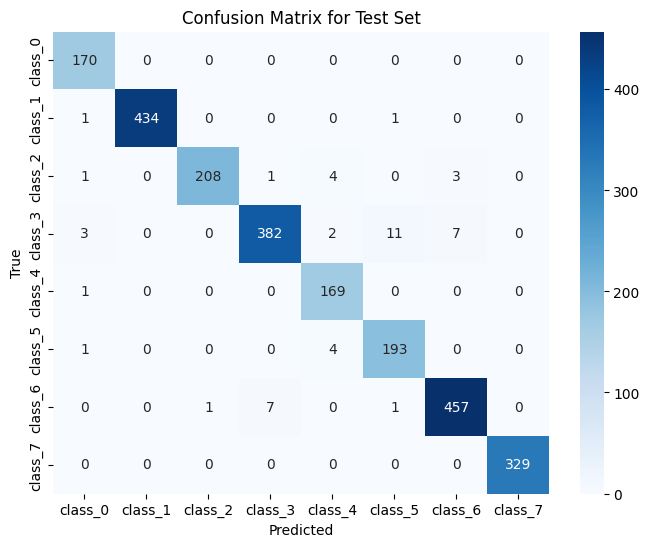

Test Classification Report:
              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98       170
     class_1       1.00      1.00      1.00       436
     class_2       1.00      0.96      0.98       217
     class_3       0.98      0.94      0.96       405
     class_4       0.94      0.99      0.97       170
     class_5       0.94      0.97      0.96       198
     class_6       0.98      0.98      0.98       466
     class_7       1.00      1.00      1.00       329

    accuracy                           0.98      2391
   macro avg       0.97      0.98      0.98      2391
weighted avg       0.98      0.98      0.98      2391



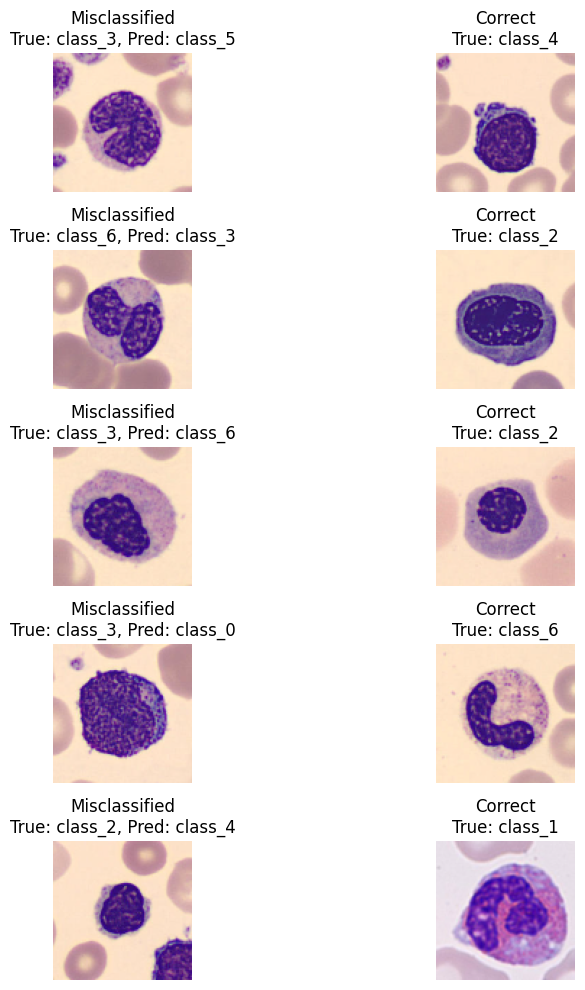


Train Results for best_inceptionresnetv2_model:


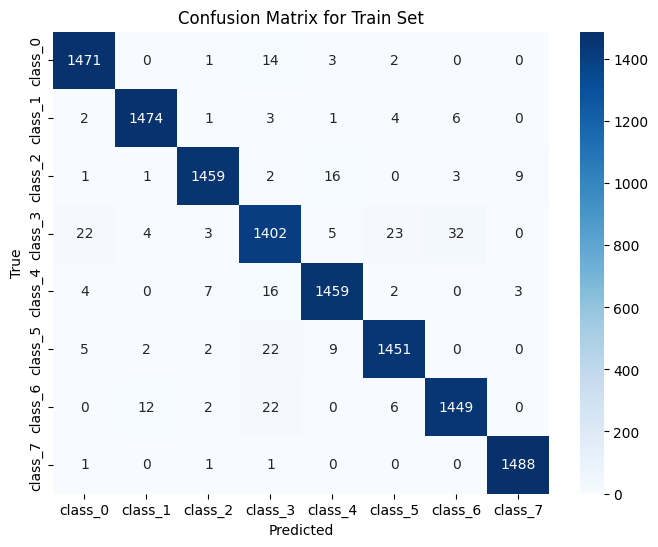

Train Classification Report:
              precision    recall  f1-score   support

     class_0       0.98      0.99      0.98      1491
     class_1       0.99      0.99      0.99      1491
     class_2       0.99      0.98      0.98      1491
     class_3       0.95      0.94      0.94      1491
     class_4       0.98      0.98      0.98      1491
     class_5       0.98      0.97      0.97      1491
     class_6       0.97      0.97      0.97      1491
     class_7       0.99      1.00      0.99      1491

    accuracy                           0.98     11928
   macro avg       0.98      0.98      0.98     11928
weighted avg       0.98      0.98      0.98     11928



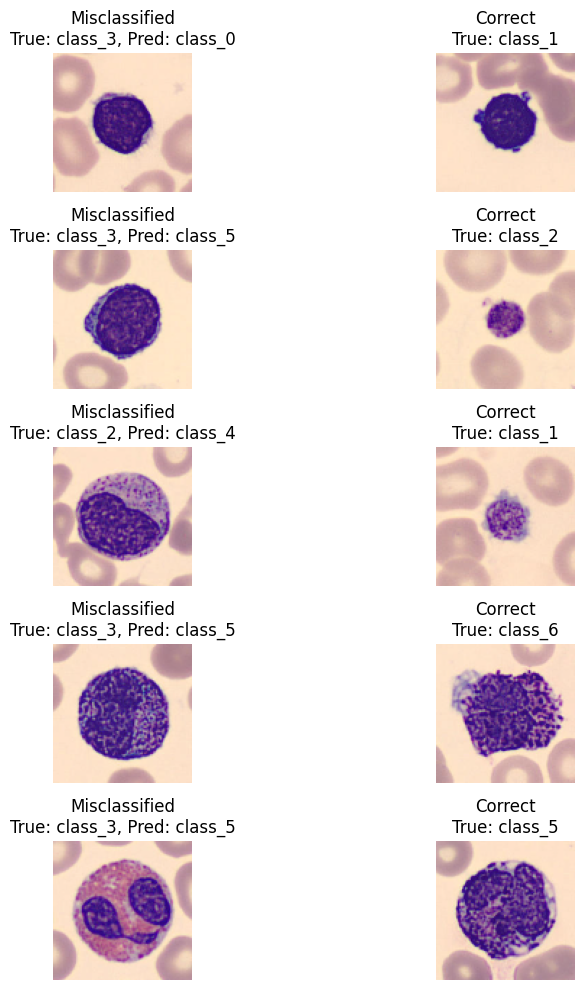


Probability Analysis for best_inceptionresnetv2_model on Test Set:


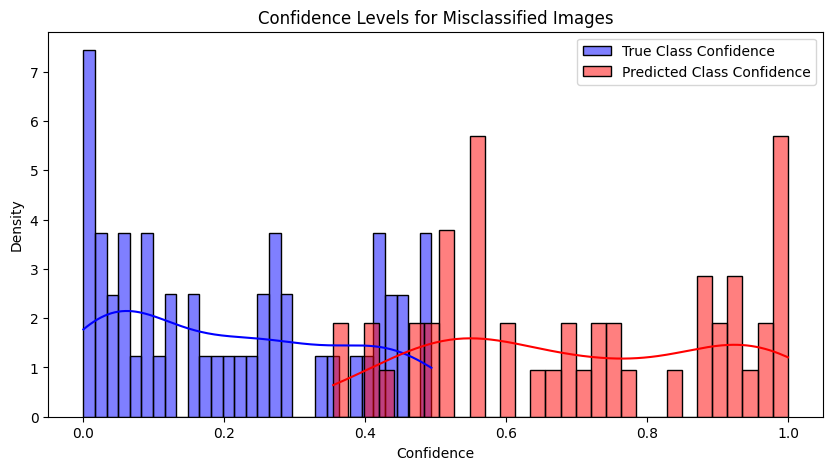

Misclassified Images: 49
Average True Class Confidence: 0.2094
Average Predicted Class Confidence: 0.7075

Probability Analysis for best_inceptionresnetv2_model on Train Set:


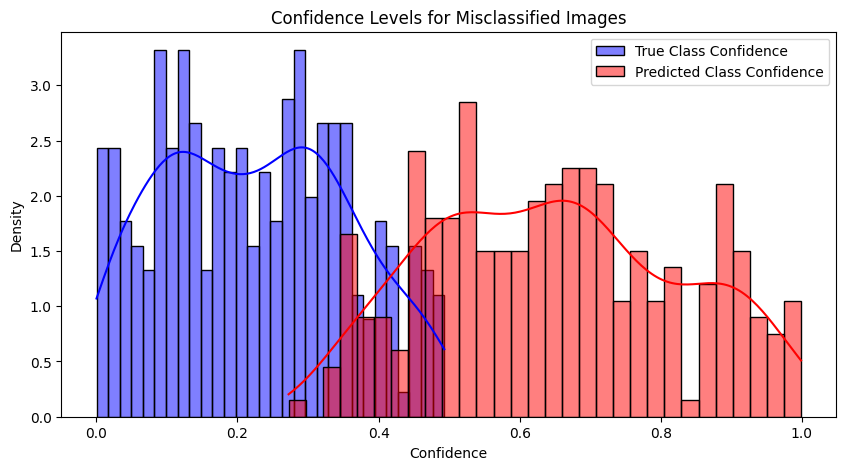

Misclassified Images: 275
Average True Class Confidence: 0.2244
Average Predicted Class Confidence: 0.6479

--- Evaluating best_efficientnetv2b3_model ---
best_efficientnetv2b3_model Test Loss: 0.0675, Test Accuracy: 0.9791
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 390ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 395ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 388ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 861ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 398ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 449ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 400ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 400ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 381ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 381ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 378ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 388ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/st

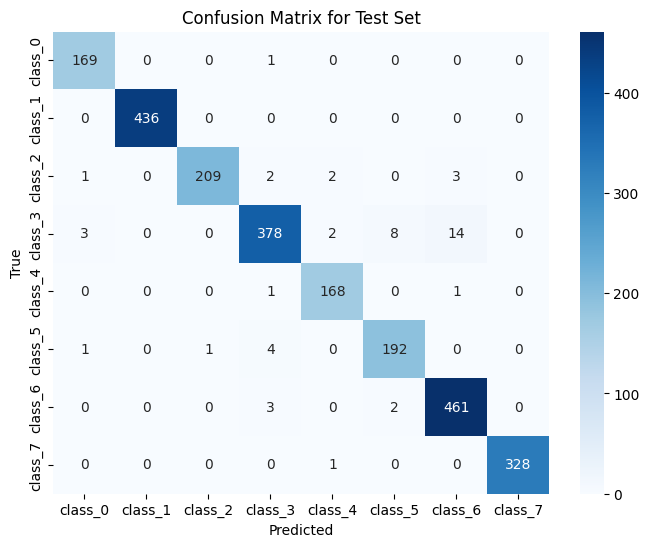

Test Classification Report:
              precision    recall  f1-score   support

     class_0       0.97      0.99      0.98       170
     class_1       1.00      1.00      1.00       436
     class_2       1.00      0.96      0.98       217
     class_3       0.97      0.93      0.95       405
     class_4       0.97      0.99      0.98       170
     class_5       0.95      0.97      0.96       198
     class_6       0.96      0.99      0.98       466
     class_7       1.00      1.00      1.00       329

    accuracy                           0.98      2391
   macro avg       0.98      0.98      0.98      2391
weighted avg       0.98      0.98      0.98      2391



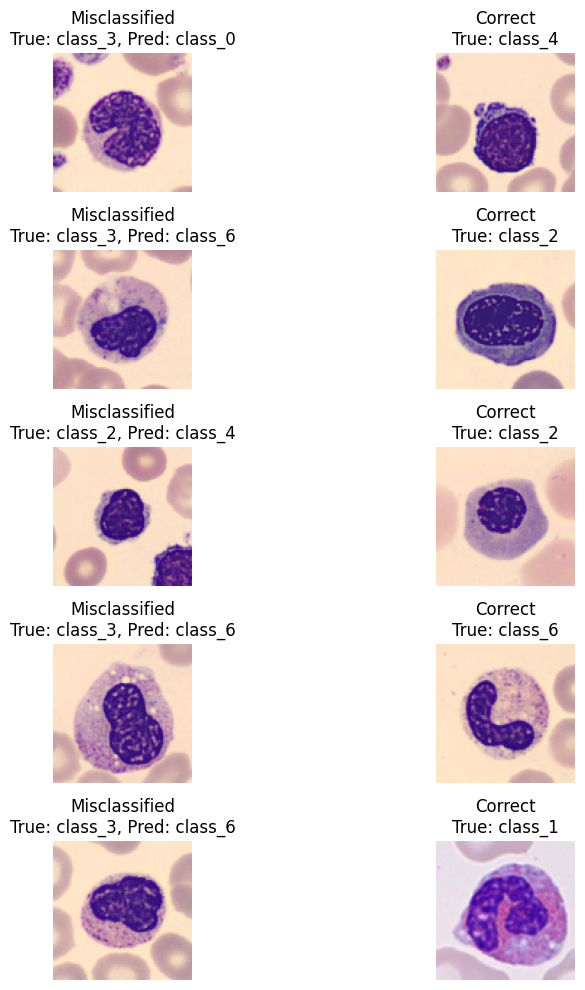


Train Results for best_efficientnetv2b3_model:


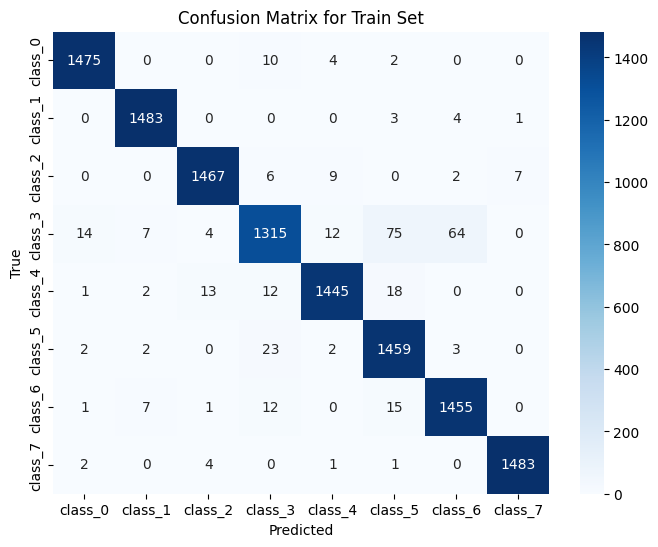

Train Classification Report:
              precision    recall  f1-score   support

     class_0       0.99      0.99      0.99      1491
     class_1       0.99      0.99      0.99      1491
     class_2       0.99      0.98      0.98      1491
     class_3       0.95      0.88      0.92      1491
     class_4       0.98      0.97      0.98      1491
     class_5       0.93      0.98      0.95      1491
     class_6       0.95      0.98      0.96      1491
     class_7       0.99      0.99      0.99      1491

    accuracy                           0.97     11928
   macro avg       0.97      0.97      0.97     11928
weighted avg       0.97      0.97      0.97     11928



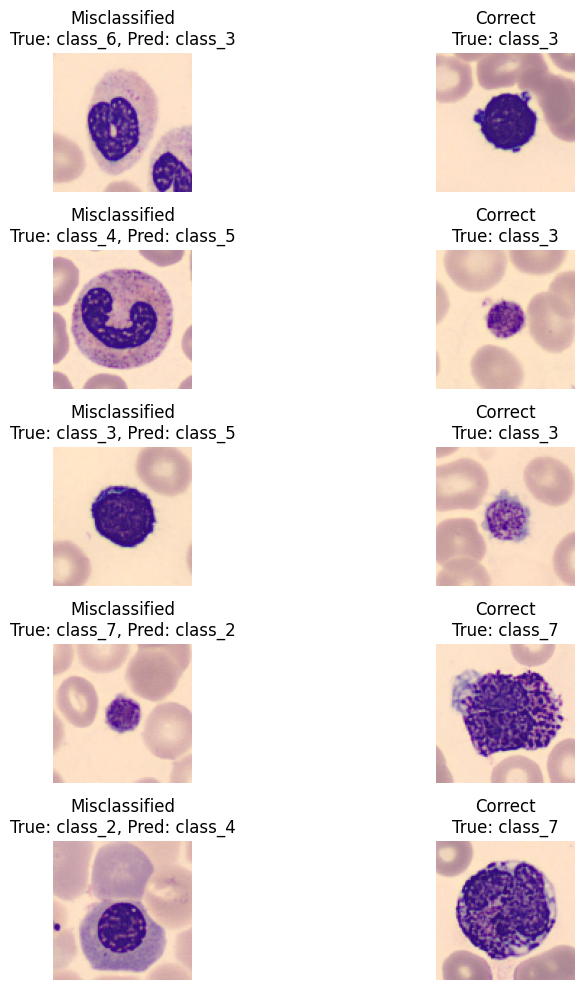


Probability Analysis for best_efficientnetv2b3_model on Test Set:


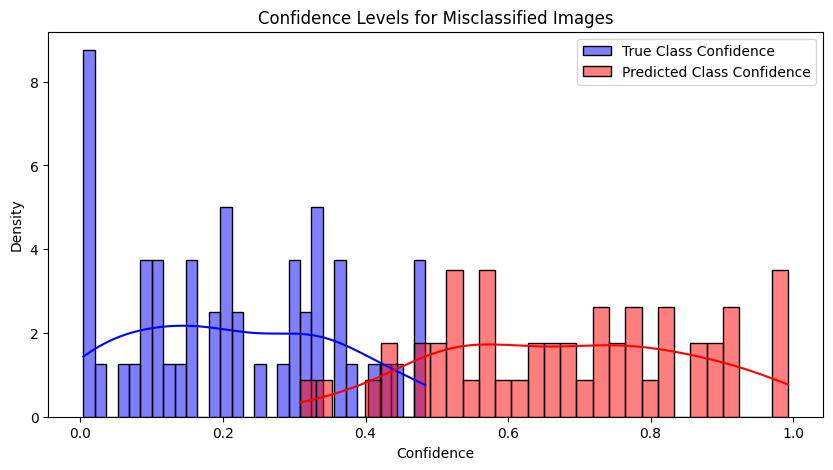

Misclassified Images: 50
Average True Class Confidence: 0.2147
Average Predicted Class Confidence: 0.6833

Probability Analysis for best_efficientnetv2b3_model on Train Set:


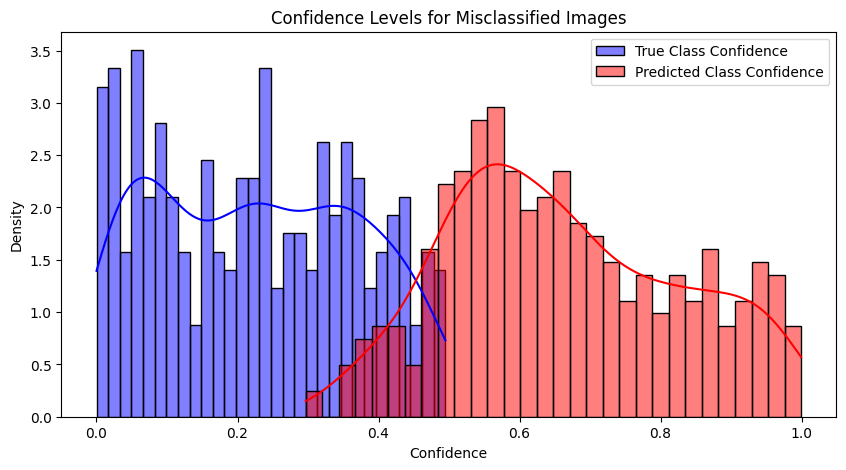

Misclassified Images: 346
Average True Class Confidence: 0.2257
Average Predicted Class Confidence: 0.6625


In [23]:
# ================================
# Main Execution Flow
# ================================

# Load data
training_images, training_labels = load_data(FILE_PATH)

# Data inspection
print(f"Shape of images: {training_images.shape}")
print(f"Type of images: {type(training_images)}")
print(f"Shape of labels: {training_labels.shape}")
print(f"Type of labels: {type(training_labels)}")

# Create DataFrame for labels
labels_df = pd.DataFrame(training_labels.flatten(), columns=['label'])
print(labels_df.head())

# Split data
X_train, X_val, X_test, y_train, y_val, y_test = split_data(training_images, training_labels)

# Inspect pixel values
print("Training Images - Min pixel value:", np.min(X_train))
print("Training Images - Max pixel value:", np.max(X_train))
print("Test Images - Min pixel value:", np.min(X_test))
print("Test Images - Max pixel value:", np.max(X_test))
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Oversample training data
X_train_balanced, y_train_balanced = oversample_data(X_train, y_train)

# Prepare datasets
def prepare_datasets(X_train, y_train, X_test, y_test, preprocess_fn):
    """Create TensorFlow datasets for training and testing."""
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(BATCH_SIZE)
    train_dataset = train_dataset.map(
        lambda x, y: preprocess_and_augment(x, y, preprocess_fn),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    test_dataset = test_dataset.batch(BATCH_SIZE)
    test_dataset = test_dataset.map(
        lambda x, y: preprocess_validation(x, y, preprocess_fn),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

    return train_dataset, test_dataset
# Initialize results dictionary
results = {}

# Iterate through each model
for model_name, (model_fn, preprocess_fn) in MODEL_EXTENSIONS.items():
    print(f"\n--- Evaluating {model_name} ---")

    # Prepare datasets
    train_ds, test_ds = prepare_datasets(X_train_balanced, y_train_balanced, X_test, y_test, preprocess_fn)

    # Load the trained model
    model = load_model(f'{model_name}.keras')

    # Evaluate on test set
    test_loss, test_accuracy = evaluate_model_performance(model, test_ds)
    print(f"{model_name} Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Collect predictions on test set
    y_true_test, y_pred_test, y_probs_test = collect_predictions(model, test_ds)

    # Collect predictions on training set (optional: use a subset to save time)
    # Here, we use the entire training set for thorough evaluation
    y_true_train, y_pred_train, y_probs_train = collect_predictions(model, train_ds)

    # Store results
    results[model_name] = {
        "test": {"true": y_true_test, "pred": y_pred_test, "probs": y_probs_test},
        "train": {"true": y_true_train, "pred": y_pred_train, "probs": y_probs_train},
    }

    # Plot and print classification results for test set
    print(f"\nTest Results for {model_name}:")
    plot_classification_results(y_true_test, y_pred_test, y_probs_test, "Test", CLASS_NAMES, X_test)

    # Plot and print classification results for training set
    print(f"\nTrain Results for {model_name}:")
    plot_classification_results(y_true_train, y_pred_train, y_probs_train, "Train", CLASS_NAMES, X_train_balanced)

    # Analyze misclassified probabilities for test set
    print(f"\nProbability Analysis for {model_name} on Test Set:")
    analyze_misclassified_probabilities(y_true_test, y_pred_test, y_probs_test, CLASS_NAMES)

    # Analyze misclassified probabilities for training set
    print(f"\nProbability Analysis for {model_name} on Train Set:")
    analyze_misclassified_probabilities(y_true_train, y_pred_train, y_probs_train, CLASS_NAMES)




Comparison on Test Set:
Images misclassified by best_inceptionresnetv2_model but correctly by best_efficientnetv2b3_model: 27
Images misclassified by best_efficientnetv2b3_model but correctly by best_inceptionresnetv2_model: 28


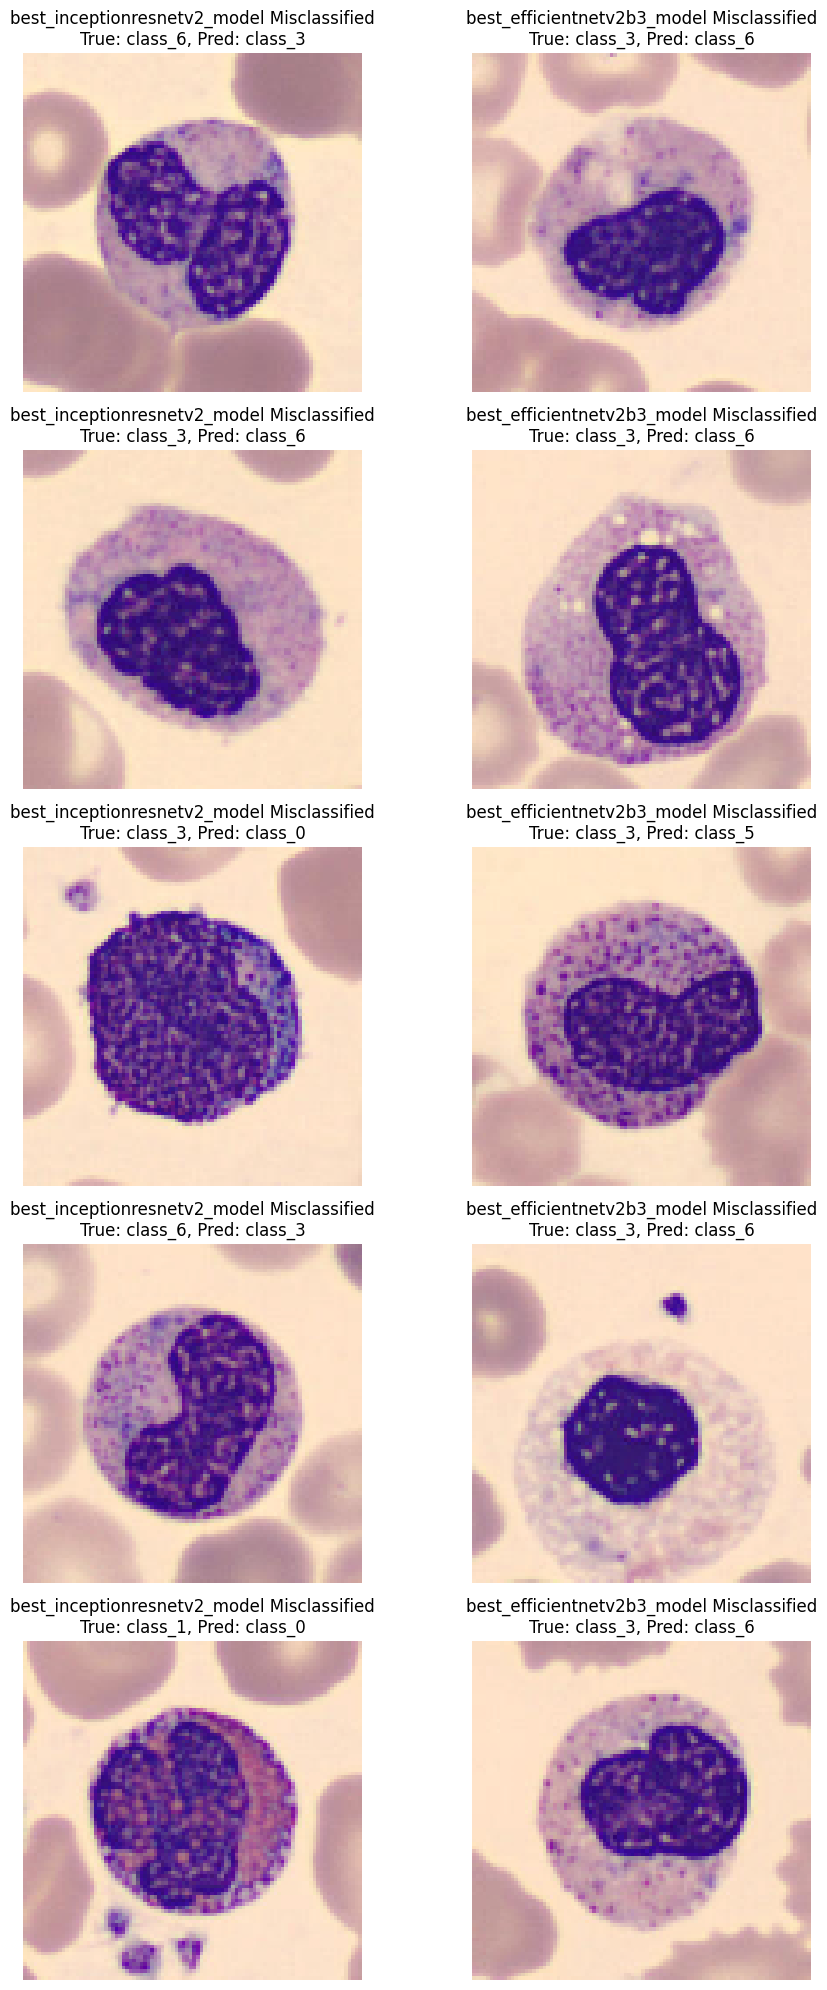


Disagreement between best_inceptionresnetv2_model and best_efficientnetv2b3_model on Test Set:
Total Predictions: 2391
Disagreements: 60 (2.51%)


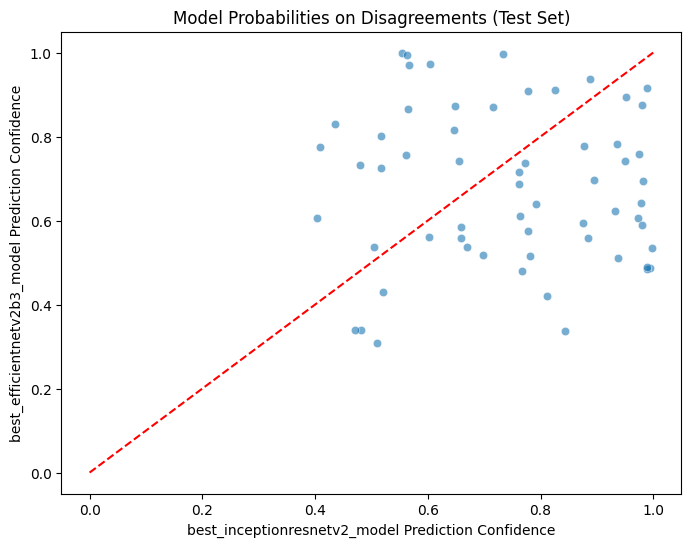


Sample Disagreements on Test Set:
Sample 50: True Label: class_3, best_inceptionresnetv2_model Pred: class_5 (0.51), best_efficientnetv2b3_model Pred: class_0 (0.31), 
Sample 98: True Label: class_6, best_inceptionresnetv2_model Pred: class_3 (0.97), best_efficientnetv2b3_model Pred: class_6 (0.61), 
Sample 130: True Label: class_3, best_inceptionresnetv2_model Pred: class_6 (0.51), best_efficientnetv2b3_model Pred: class_3 (0.54), 
Sample 178: True Label: class_3, best_inceptionresnetv2_model Pred: class_3 (0.67), best_efficientnetv2b3_model Pred: class_6 (0.54), 
Sample 206: True Label: class_3, best_inceptionresnetv2_model Pred: class_0 (0.93), best_efficientnetv2b3_model Pred: class_3 (0.62), 

best_inceptionresnetv2_model correct and best_efficientnetv2b3_model incorrect on Test set: 28 samples
best_efficientnetv2b3_model correct and best_inceptionresnetv2_model incorrect on Test set: 27 samples
Average best_inceptionresnetv2_model confidence (correct): 0.8222
Average best_effici

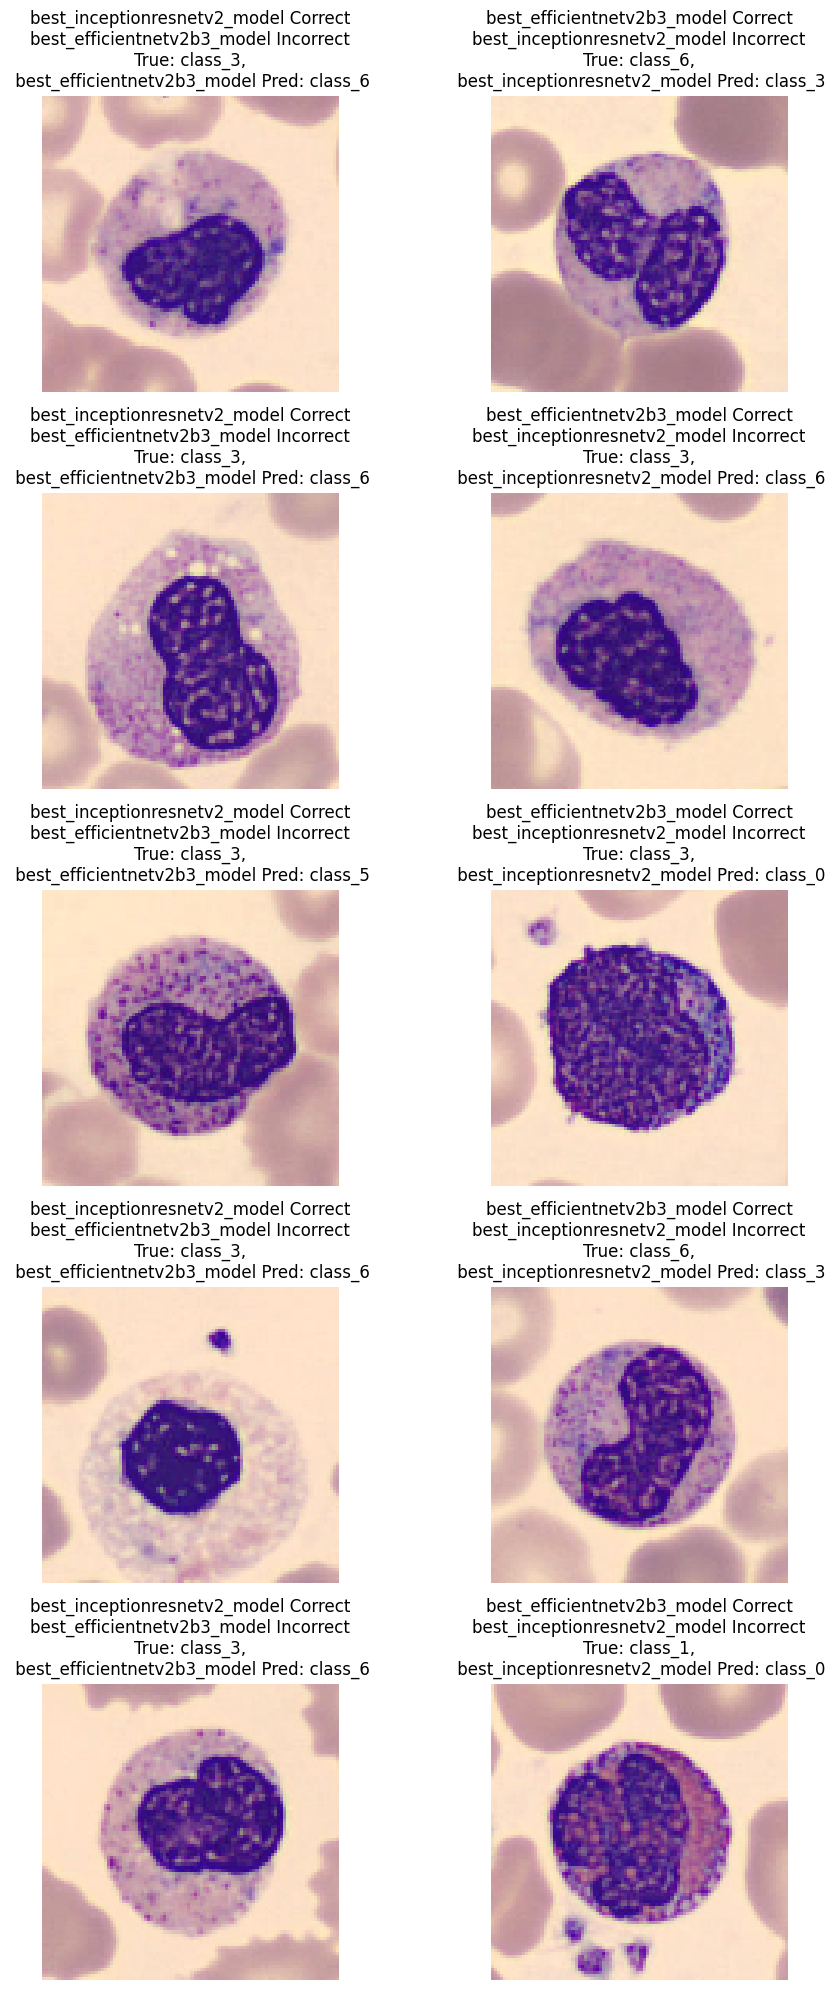


Disagreement between best_inceptionresnetv2_model and best_efficientnetv2b3_model on Test Set:
Total Predictions: 2391
Disagreements: 60 (2.51%)


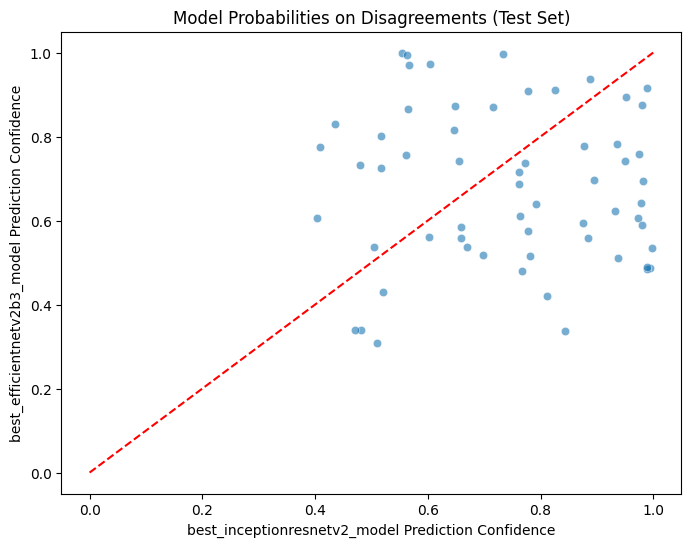


Sample Disagreements with Softmax Probabilities on Test Set:
Sample 50: True: class_3, best_inceptionresnetv2_model Pred: class_5 (0.51), best_efficientnetv2b3_model Pred: class_0 (0.31)
Sample 98: True: class_6, best_inceptionresnetv2_model Pred: class_3 (0.97), best_efficientnetv2b3_model Pred: class_6 (0.61)
Sample 130: True: class_3, best_inceptionresnetv2_model Pred: class_6 (0.51), best_efficientnetv2b3_model Pred: class_3 (0.54)
Sample 178: True: class_3, best_inceptionresnetv2_model Pred: class_3 (0.67), best_efficientnetv2b3_model Pred: class_6 (0.54)
Sample 206: True: class_3, best_inceptionresnetv2_model Pred: class_0 (0.93), best_efficientnetv2b3_model Pred: class_3 (0.62)

Comparison on Train Set:
Images misclassified by best_inceptionresnetv2_model but correctly by best_efficientnetv2b3_model: 61
Images misclassified by best_efficientnetv2b3_model but correctly by best_inceptionresnetv2_model: 9127


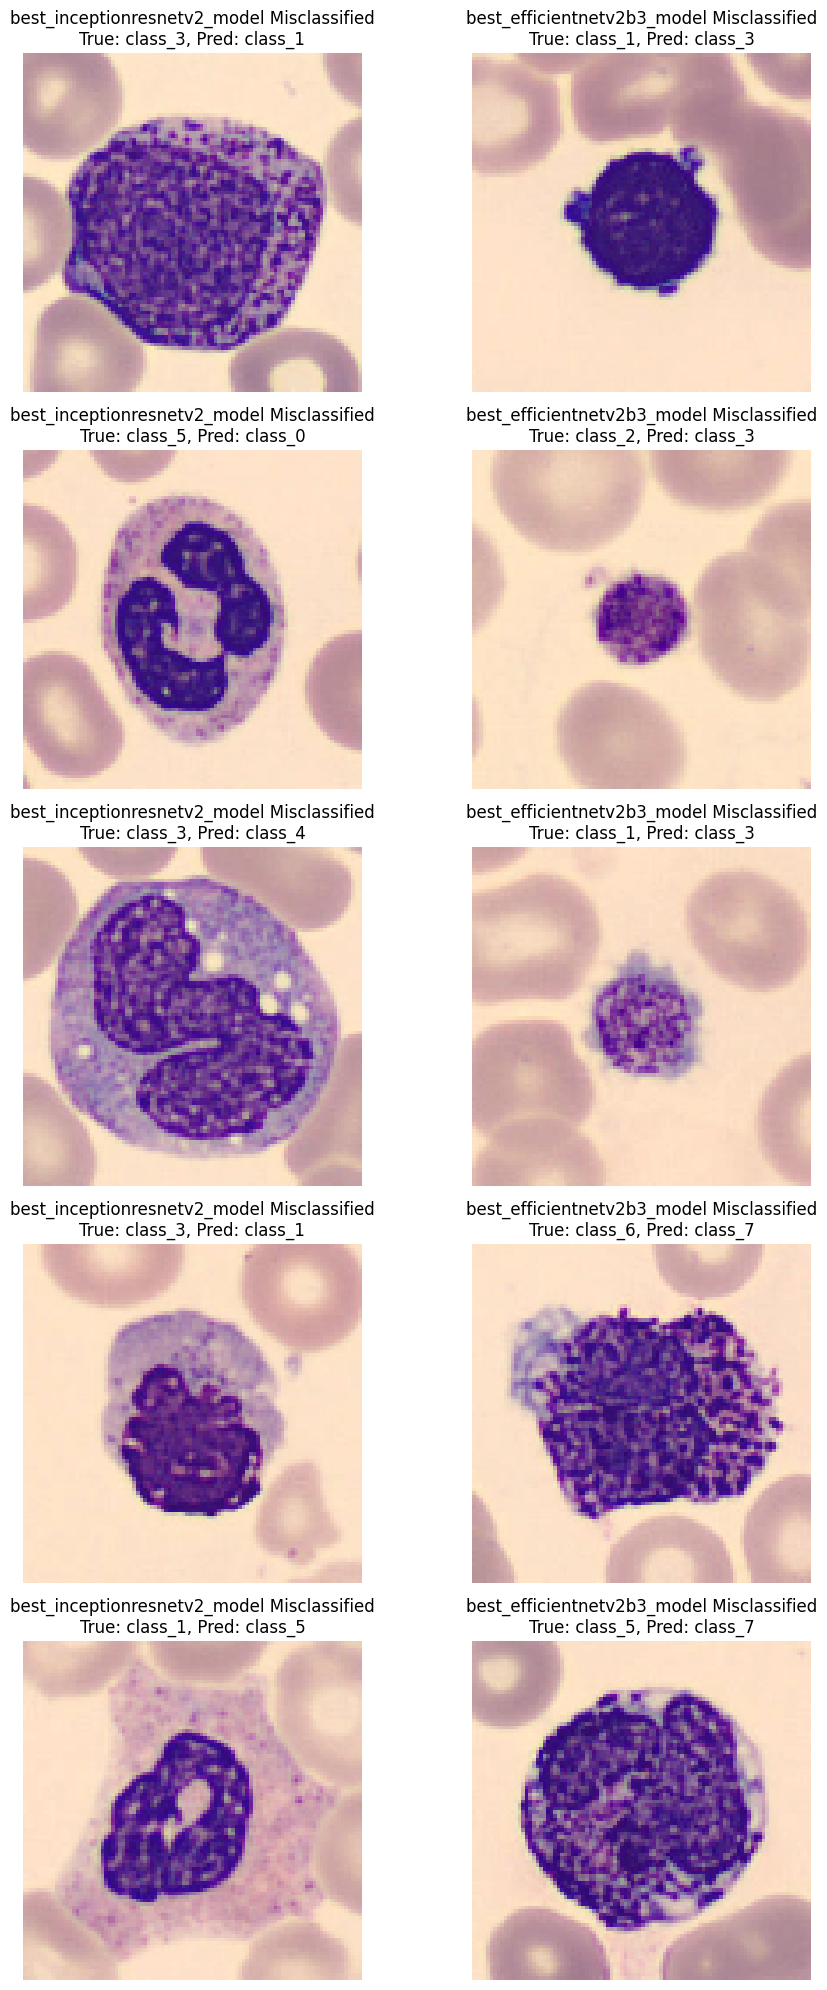


Disagreement between best_inceptionresnetv2_model and best_efficientnetv2b3_model on Train Set:
Total Predictions: 11928
Disagreements: 9366 (78.52%)


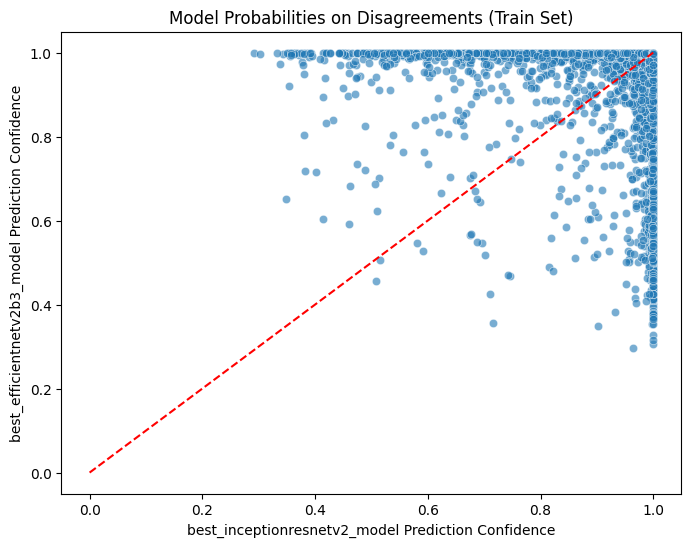


Sample Disagreements on Train Set:
Sample 0: True Label: class_1, best_inceptionresnetv2_model Pred: class_1 (1.00), best_efficientnetv2b3_model Pred: class_3 (1.00), 
Sample 1: True Label: class_2, best_inceptionresnetv2_model Pred: class_2 (1.00), best_efficientnetv2b3_model Pred: class_3 (0.68), 
Sample 2: True Label: class_1, best_inceptionresnetv2_model Pred: class_1 (1.00), best_efficientnetv2b3_model Pred: class_3 (1.00), 
Sample 3: True Label: class_6, best_inceptionresnetv2_model Pred: class_6 (1.00), best_efficientnetv2b3_model Pred: class_7 (1.00), 
Sample 4: True Label: class_5, best_inceptionresnetv2_model Pred: class_5 (0.99), best_efficientnetv2b3_model Pred: class_7 (0.99), 

best_inceptionresnetv2_model correct and best_efficientnetv2b3_model incorrect on Train set: 9127 samples
best_efficientnetv2b3_model correct and best_inceptionresnetv2_model incorrect on Train set: 61 samples
Average best_inceptionresnetv2_model confidence (correct): 0.9710
Average best_efficient

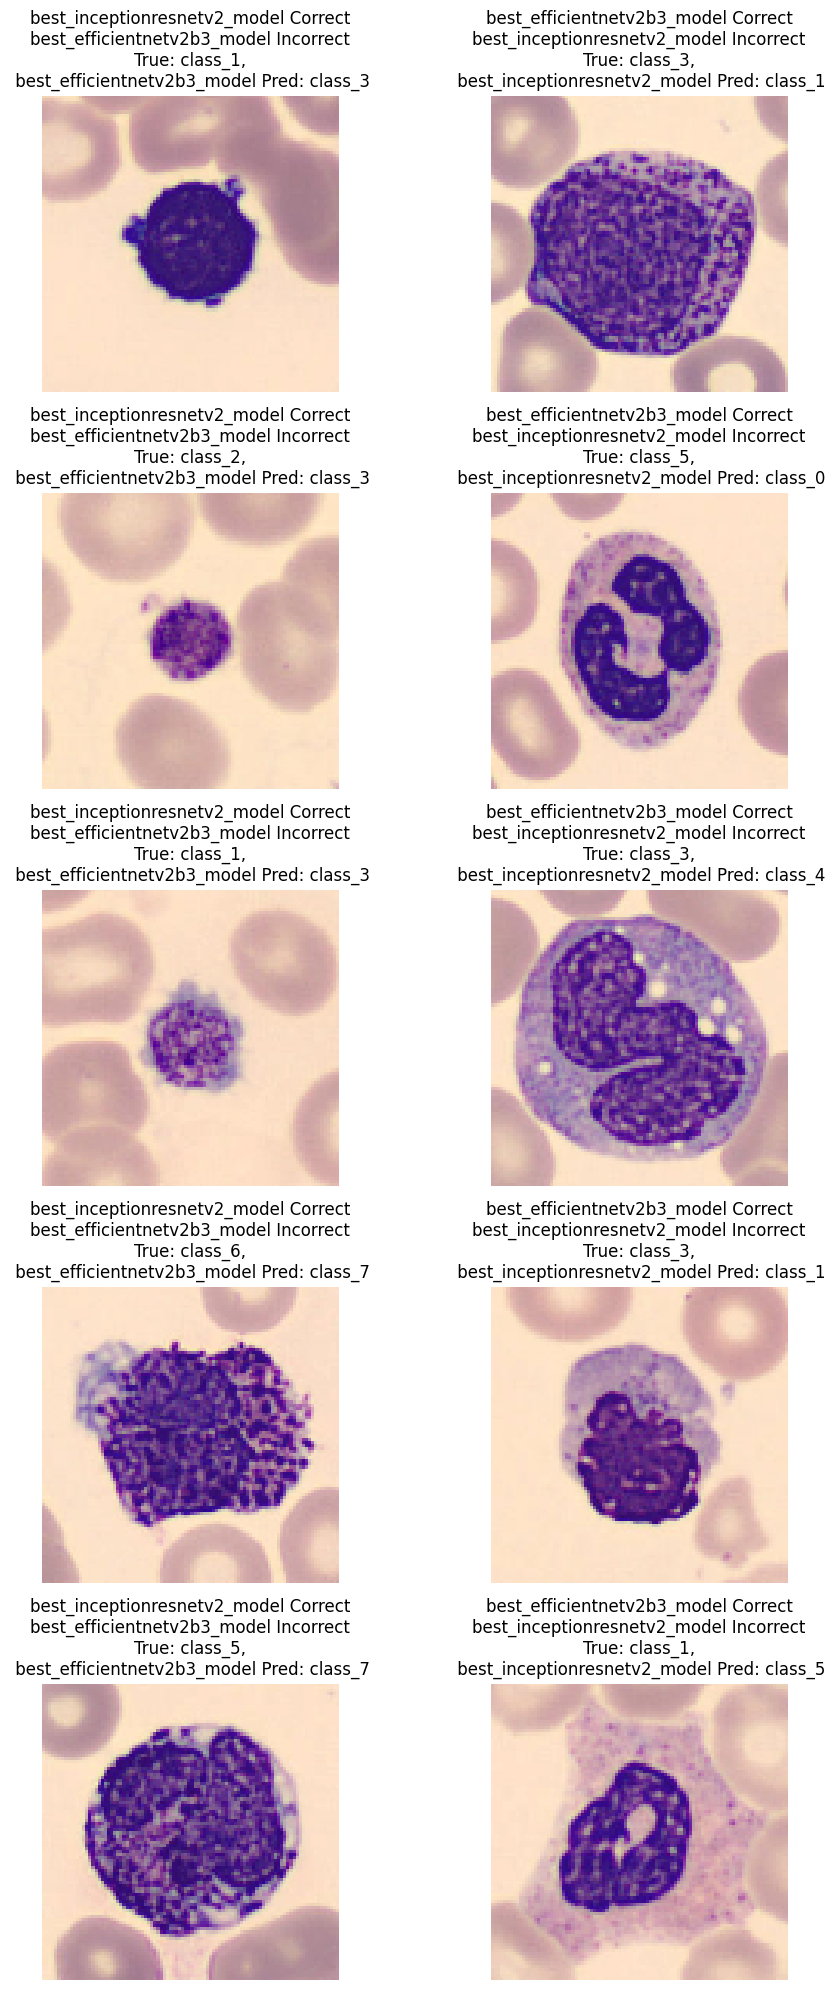


Disagreement between best_inceptionresnetv2_model and best_efficientnetv2b3_model on Train Set:
Total Predictions: 11928
Disagreements: 9366 (78.52%)


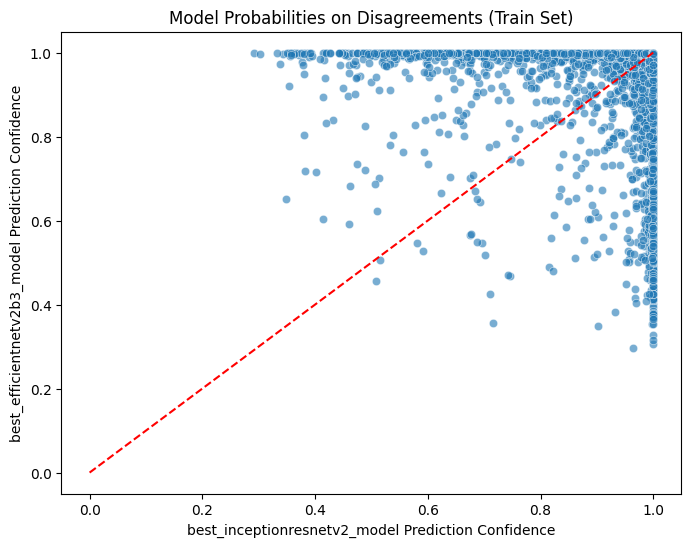


Sample Disagreements with Softmax Probabilities on Train Set:
Sample 0: True: class_1, best_inceptionresnetv2_model Pred: class_1 (1.00), best_efficientnetv2b3_model Pred: class_3 (1.00)
Sample 1: True: class_2, best_inceptionresnetv2_model Pred: class_2 (1.00), best_efficientnetv2b3_model Pred: class_3 (0.68)
Sample 2: True: class_1, best_inceptionresnetv2_model Pred: class_1 (1.00), best_efficientnetv2b3_model Pred: class_3 (1.00)
Sample 3: True: class_6, best_inceptionresnetv2_model Pred: class_6 (1.00), best_efficientnetv2b3_model Pred: class_7 (1.00)
Sample 4: True: class_5, best_inceptionresnetv2_model Pred: class_5 (0.99), best_efficientnetv2b3_model Pred: class_7 (0.99)


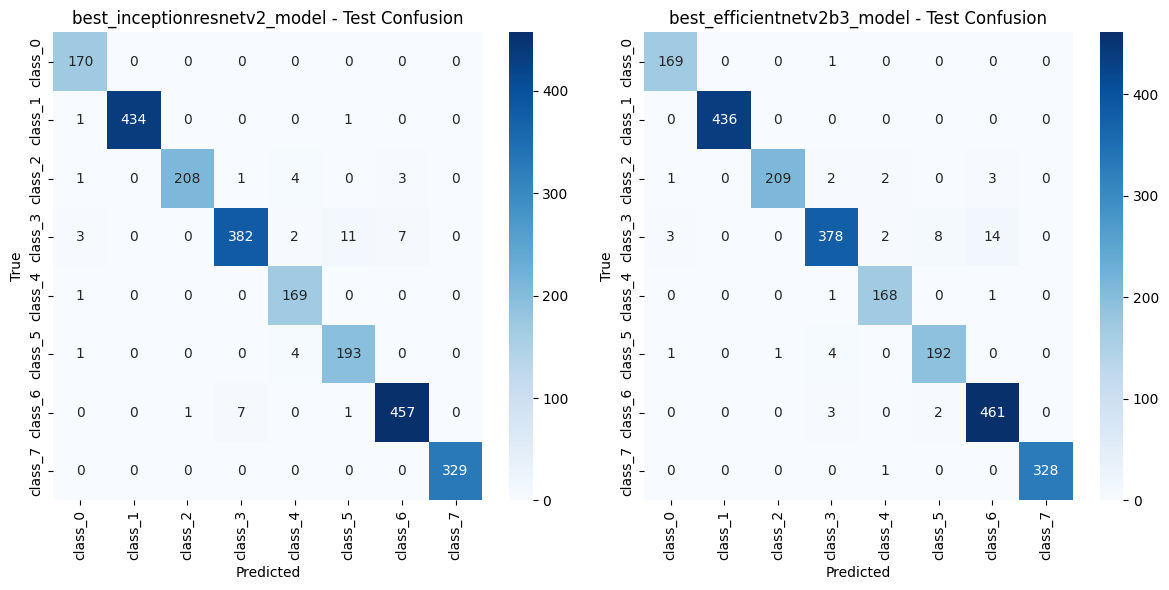

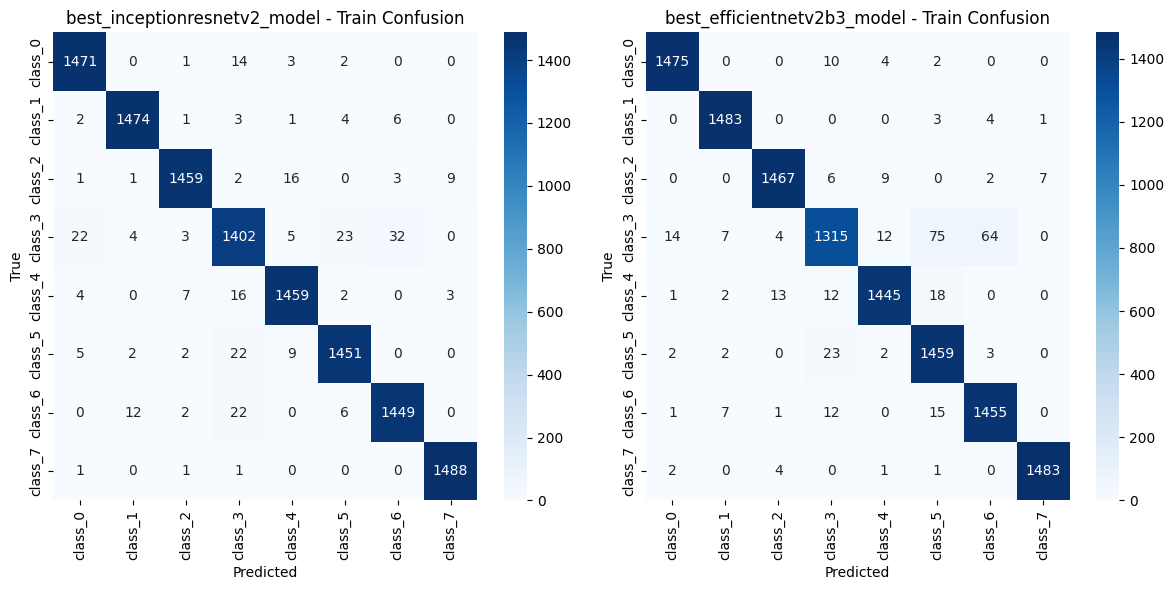


=== Summary for best_inceptionresnetv2_model ===
Test Classification Report:
              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98       170
     class_1       1.00      1.00      1.00       436
     class_2       1.00      0.96      0.98       217
     class_3       0.98      0.94      0.96       405
     class_4       0.94      0.99      0.97       170
     class_5       0.94      0.97      0.96       198
     class_6       0.98      0.98      0.98       466
     class_7       1.00      1.00      1.00       329

    accuracy                           0.98      2391
   macro avg       0.97      0.98      0.98      2391
weighted avg       0.98      0.98      0.98      2391

Train Classification Report:
              precision    recall  f1-score   support

     class_0       0.98      0.99      0.98      1491
     class_1       0.99      0.99      0.99      1491
     class_2       0.99      0.98      0.98      1491
     class_3       0.95  

In [30]:
# Comparison and Disagreement Analysis Between Models
model_names = list(MODEL_EXTENSIONS.keys())
for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        model_a = model_names[i]
        model_b = model_names[j]
        for dataset in ['test', 'train']:
            compare_model_misclassifications(results, model_a, model_b, dataset=dataset)
            analyze_model_disagreements(results, model_a, model_b, dataset=dataset)
            analyze_model_agreements(results, model_a, model_b, dataset=dataset)
            compare_softmax_probabilities(results, model_a, model_b, dataset=dataset)

# Plot Combined Confusion Matrices for all models
plot_combined_confusion_matrices(results, model_names, dataset='test')
plot_combined_confusion_matrices(results, model_names, dataset='train')

# Print Summary Classification Reports
for model_name, metrics in results.items():
        print(f"\n=== Summary for {model_name} ===")
        print(f"Test Classification Report:\n{classification_report(metrics['test']['true'], metrics['test']['pred'], target_names=CLASS_NAMES)}")
        print(f"Train Classification Report:\n{classification_report(metrics['train']['true'], metrics['train']['pred'], target_names=CLASS_NAMES)}")

